**Boston Housing Decision Tree Regression**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,8]
sns.set()


SEED = 1

#import data and create X & y sets
df = pd.read_csv('housing.csv', header=None)

In [33]:
X = df.iloc[:,0:13]
y = df.iloc[:,13:]
X.shape

(506, 13)

In [34]:
name = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
X.columns = name


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)


In [36]:
#CART ----------------------------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor

#define the grid of hyperparameters
params_dt = {'max_depth': [3,4,5,6,7,8], 'min_samples_leaf':[0.05,0.075,0.1,0.125,0.15], 'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

#instantiate Decision Tree
dt = DecisionTreeRegressor(random_state=SEED)

#instantiate a 10-fold CV grid search object
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, cv=5, n_jobs=-1)

#Fit grid_dt to the training data
grid_dt.fit(X_train, y_train)

#extract the best params from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print(best_hyperparams)

#extract best CV score 
best_CV_score = grid_dt.best_score_
print(best_CV_score)

#extract best model from grid_dt
best_model = grid_dt.best_estimator_

#refit the best model to all training data
best = best_model.fit(X_train,y_train)

#make predictions on test data
y_pred = best.predict(X_test)

{'max_depth': 6, 'max_features': 0.9, 'min_samples_leaf': 0.05}
0.747647921836525


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


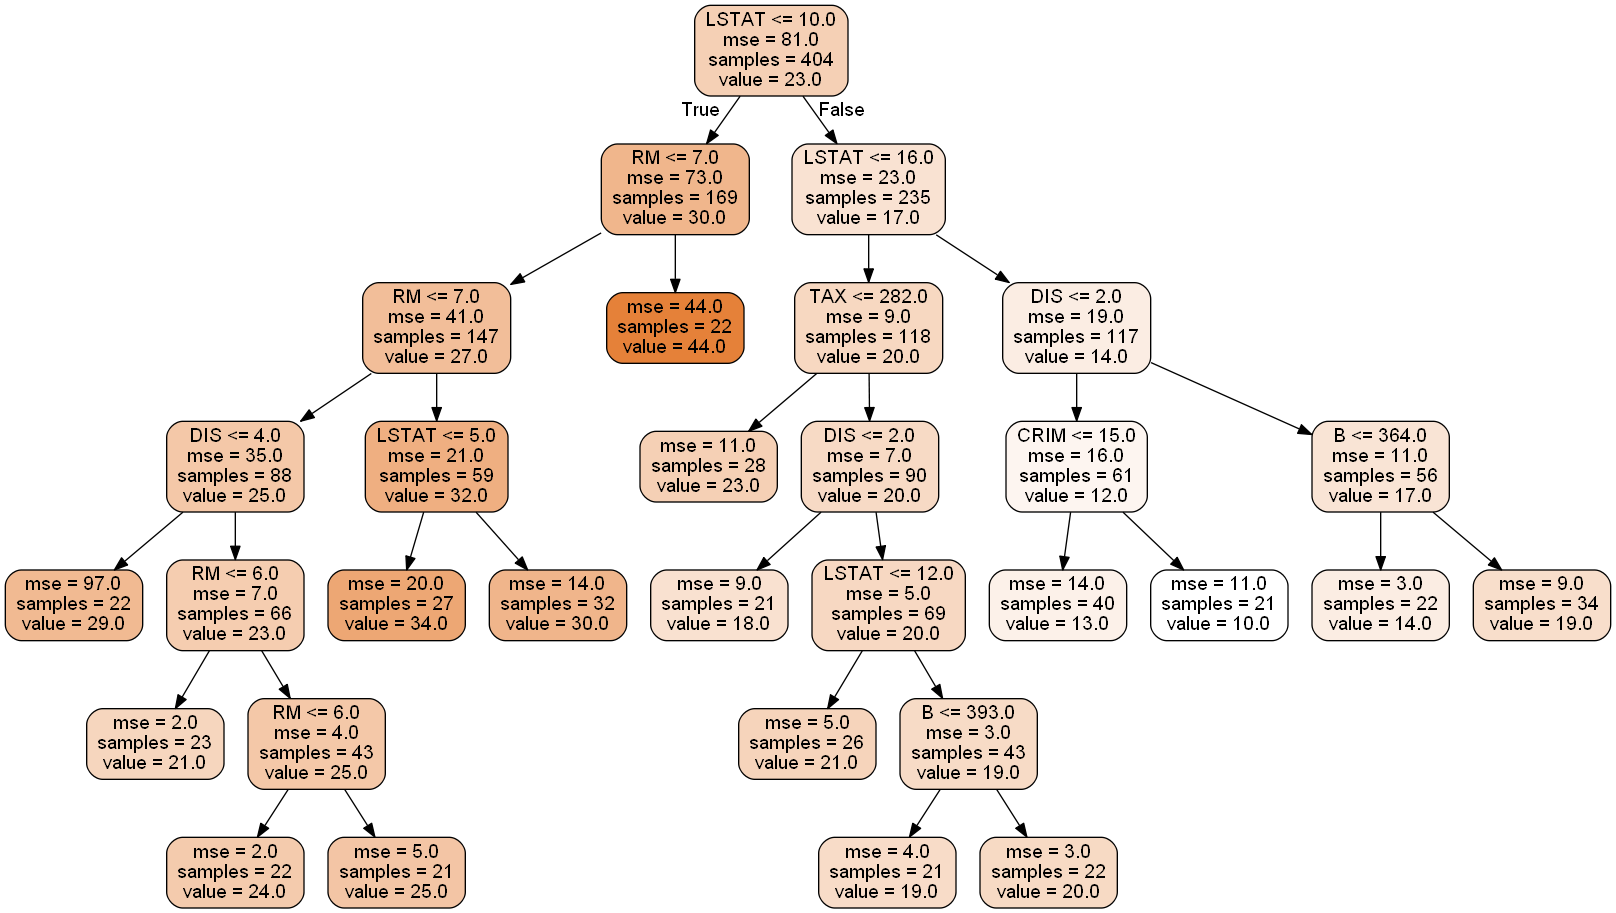

In [37]:
#generate and visually display optimal decision tree
from sklearn import tree
tree.export_graphviz(best, out_file='tree2.dot', feature_names = X.columns,rounded = True, proportion = False, precision = 0, filled = True)
!dot -Tpng tree2.dot -o tree2.png
from IPython.display import Image
Image(filename = 'tree2.png')